In [417]:
#Load the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
DataFile = pd.read_csv("sales.csv")
import gc

In [418]:
#For Q6b Create Bins for Customer_Since Buckets
DataFile["CUSTOMER_SINCE"] = pd.cut(DataFile["CUSTOMER_SINCE(YRS)"], bins=[0,5,10,20,40], labels=[1,2,3,4])

#### Data Preparation

In [419]:
Sales_R1 = DataFile[0:11]
Sales_R2 = DataFile[12:]
Customer_segment = DataFile.sort_values(by=['CUSTOMER_SEGMENT'])
Customer_segment.reset_index()
Banks = Customer_segment[0:7]
Hospitals = Customer_segment[8:13]
Mining = Customer_segment[14:]
Customer_since = DataFile.sort_values(by=['CUSTOMER_SINCE(YRS)'])
Customer_since.reset_index()
print("Data Preparation is now complete")

Data Preparation is now complete


In [420]:
DataFile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
SALES_REP_NAME                     24 non-null object
CUSTOMER_NAME                      24 non-null object
CUSTOMER_SEGMENT                   24 non-null object
CUSTOMER_SINCE(YRS)                24 non-null int64
CURRENT_ACCT_BALANCE(million $)    24 non-null int64
CUSTOMER_SINCE                     24 non-null category
dtypes: category(1), int64(2), object(3)
memory usage: 1.2+ KB


*** Q1 Check for Anomalies ***

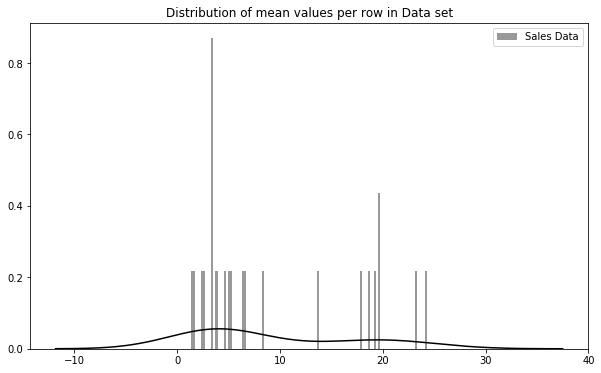

In [421]:
features = [c for c in DataFile.columns if c not in ['SALES_REP_NAME','CUSTOMER_NAME','CUSTOMER_SEGMENT']]
plt.figure(figsize=(10,6))
plt.title("Distribution of mean values per row in Data set")
sns.distplot(DataFile[features].mean(axis=1),color="black", kde=True,bins=120, label='Sales Data')
plt.legend()
plt.show()

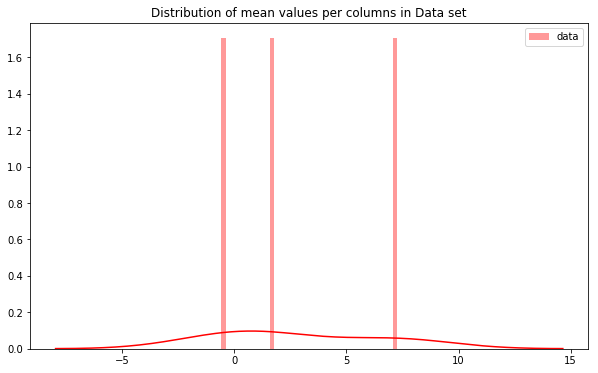

In [422]:
plt.figure(figsize=(10,6))
plt.title("Distribution of mean values per columns in Data set")
sns.distplot(DataFile[features].kurtosis(axis=0),color="red",kde=True,bins=40, label='data')
plt.legend()
plt.show()

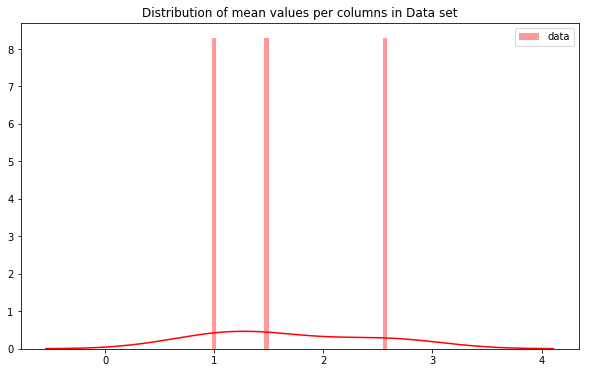

In [423]:
plt.figure(figsize=(10,6))
plt.title("Distribution of mean values per columns in Data set")
sns.distplot(DataFile[features].skew(axis=0),color="red",kde=True,bins=40, label='data')
plt.legend()
plt.show()

Check for Anomalies in Customer_Since(Yrs) using Box Plot

No handles with labels found to put in legend.


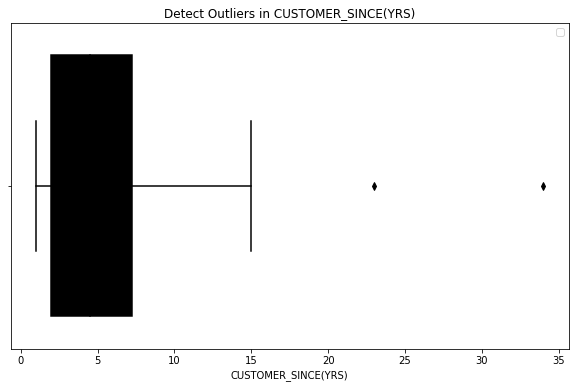

In [424]:
plt.figure(figsize=(10,6))
plt.title("Detect Outliers in CUSTOMER_SINCE(YRS)")
sns.boxplot(x = DataFile['CUSTOMER_SINCE(YRS)'],color="black")
plt.legend()
plt.show()

Check for Anomalies in CURRENT_ACCT_BALANCE using Box Plot

No handles with labels found to put in legend.


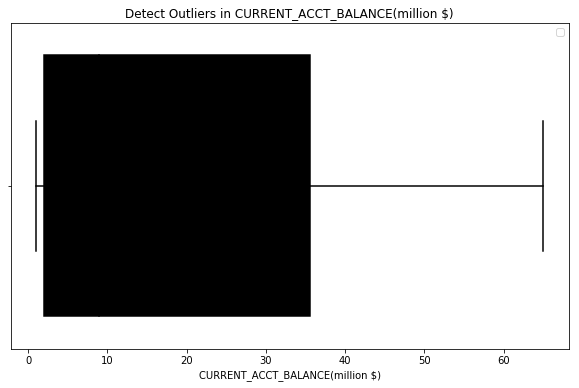

In [425]:
plt.figure(figsize=(10,6))
plt.title("Detect Outliers in CURRENT_ACCT_BALANCE(million $)")
sns.boxplot(x = DataFile['CURRENT_ACCT_BALANCE(million $)'],color="black")
plt.legend()
plt.show()

Now Check for Outliers in Customer_Since(Yrs) and CURRENT_ACCT_BALANCE using Scattered Plots

Text(0.5,0,'CUSTOMER_SINCE(YRS)')

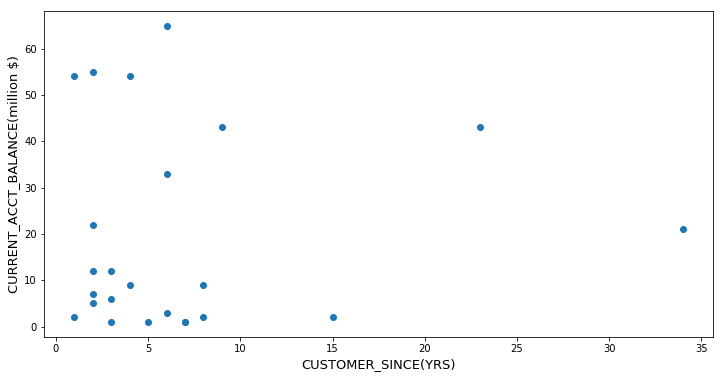

In [426]:
plt.figure(figsize=(12,6))
plt.scatter(x=DataFile['CUSTOMER_SINCE(YRS)'], y=DataFile['CURRENT_ACCT_BALANCE(million $)'])
plt.ylabel("CURRENT_ACCT_BALANCE(million $)", fontsize=13)
plt.xlabel("CUSTOMER_SINCE(YRS)", fontsize=13)

Looks like I found some outliers. Lets confirm if they are influencers or outliers by calculating the Z score

In [427]:
from scipy import stats
print(stats.zscore(DataFile['CUSTOMER_SINCE(YRS)']))
print(stats.zscore(DataFile['CURRENT_ACCT_BALANCE(million $)']))

[-0.51050337 -0.10658862 -0.64514162  0.16268789 -0.64514162 -0.37586512
 -0.64514162  0.29732614 -0.77977987 -0.51050337 -0.10658862  0.02804964
 -0.64514162 -0.64514162 -0.37586512  3.66328242  2.18226166 -0.51050337
  1.10515565  0.02804964  0.16268789 -0.10658862 -0.77977987 -0.24122687]
[-0.87672617 -0.78086545 -0.68500473 -0.82879581 -0.58914401 -0.49328329
 -0.34949221  1.13634895  1.66358291 -0.34949221  2.19081686 -0.87672617
  0.12981139  1.71151327  1.66358291  0.08188103  1.13634895 -0.63707437
 -0.82879581 -0.87672617 -0.49328329  0.65704535 -0.82879581 -0.87672617]


In [428]:
outliers=[]
def detect_outlier(data):
    
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    
    
    for y in data:
        z_score= (y - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [429]:
outlier_datapoints_1 = detect_outlier(DataFile['CUSTOMER_SINCE(YRS)'])

print(outlier_datapoints_1)

[34]


Lets see how many outliers are detected by DBSCAN

In [430]:
from sklearn.cluster import DBSCAN
Outlier_Data = DataFile[['CUSTOMER_SINCE(YRS)','CUSTOMER_SINCE(YRS)']]

outlier_detection = DBSCAN(min_samples = 2, eps = 3)
clusters = outlier_detection.fit_predict(Outlier_Data)
list(clusters).count(-1)

3

*** There are significant outlier in the dataset in Customer_Since(yrs) as shown in Scattered Plot, Box Plot, DB SCAN and Z Values. Also the data is heavily skewed on left and right. it is also platokurtic. Summary : Data is not normaly distributed ***

In [431]:
Sales_R1.describe()

,CUSTOMER_SINCE(YRS),CURRENT_ACCT_BALANCE(million $)
count,11.000000,11.000000
mean,4.181818,19.363636
std,2.676497,23.070643
min,1.000000,1.000000
25%,2.000000,4.000000
50%,3.000000,9.000000
75%,6.000000,27.500000
max,9.000000,65.000000


In [432]:
Sales_R2.describe()

,CUSTOMER_SINCE(YRS),CURRENT_ACCT_BALANCE(million $)
count,12.000000,12.000000
mean,9.166667,20.750000
std,10.043843,20.811382
min,1.000000,1.000000
25%,2.750000,2.000000
50%,5.500000,15.000000
75%,9.750000,35.500000
max,34.000000,55.000000


***Q3A. Most Profitable, 2nd most profitable and least profitable customers for Each Representative***

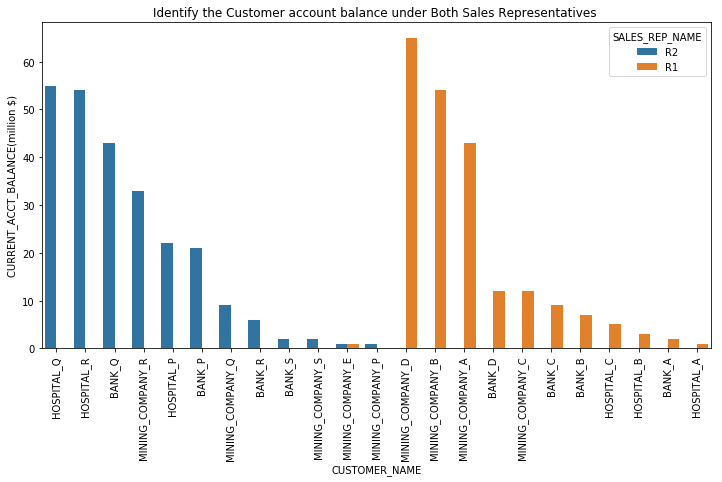

In [433]:
plt.figure(figsize=(12, 6));
Customer_since_plot1 = pd.DataFrame(Customer_since.groupby(['SALES_REP_NAME','CUSTOMER_NAME'],sort=True)['CURRENT_ACCT_BALANCE(million $)'].sum()).reset_index()
Customer_since_plot1 = Customer_since_plot1.sort_values(by=['SALES_REP_NAME','CURRENT_ACCT_BALANCE(million $)'], ascending=False)
Customer_since_plot1.reset_index()
g = sns.barplot(x='CUSTOMER_NAME', y='CURRENT_ACCT_BALANCE(million $)', data=Customer_since_plot1, hue = 'SALES_REP_NAME');
plt.xticks(rotation=90)

plt.title('Identify the Customer account balance under Both Sales Representatives ');

<pre>

Q3A1. - The most profitable customer for R1        : MINING_COMPANY_D
      - The most profitable customer for R2        : HOSPITAL_Q
Q3A2. - The least profitable customer for R1       : HOSPITAL_A and MINING_COMPANY_E
      - The least profitable customer for R2       : MINNING_COMPANY_P and MINING_COMPANY_E
Q3A3. - The second most profitable customer for R1 : MINING_COMPANY_B
      - The second most profitable customer for R2 : HOSPITAL_R

</pre>     

***Q3B. Most Profitable, 2nd most profitable and least profitable customers for Each Customer Segment***

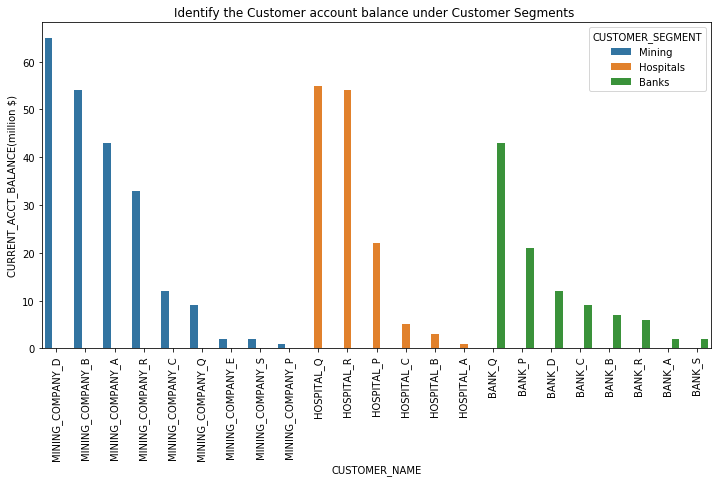

In [434]:
plt.figure(figsize=(12, 6));
Customer_segment_plot1 = pd.DataFrame(Customer_segment.groupby(['CUSTOMER_SEGMENT','CUSTOMER_NAME'],sort=True)['CURRENT_ACCT_BALANCE(million $)'].sum()).reset_index()
Customer_segment_plot1 = Customer_segment_plot1.sort_values(by=['CUSTOMER_SEGMENT','CURRENT_ACCT_BALANCE(million $)'], ascending=False)
Customer_segment_plot1.reset_index()
g = sns.barplot(x='CUSTOMER_NAME', y='CURRENT_ACCT_BALANCE(million $)', data=Customer_segment_plot1, hue = 'CUSTOMER_SEGMENT');
plt.xticks(rotation=90)

plt.title('Identify the Customer account balance under Customer Segments ');

<pre>

Q3B1. - The most profitable customer for Mining          : MINING_COMPANY_D
      - The most profitable customer for Banks           : BANK_Q
      - The most profitable customer for Hospitals       : HOSPITAL_Q
Q3B2. - The least profitable customer for Mining         : MINING_COMPANY_P  
      - The least profitable customer for Bank           : BANK_S and BANK_A
      - The least profitable customer for Hospitals      : HOSPITAL_A
Q3B3. - The second most profitable customer for Mining   : MINING_COMPANY_B  
      - The second most profitable customer for Hospital : HOSPITAL_R
      - The second most profitable customer for Banks    : BANK_P
</pre>     

***Q6A. Sort Customers from Highest Balance to the lowest balance for each sales representative.*** (Derived from Q3)

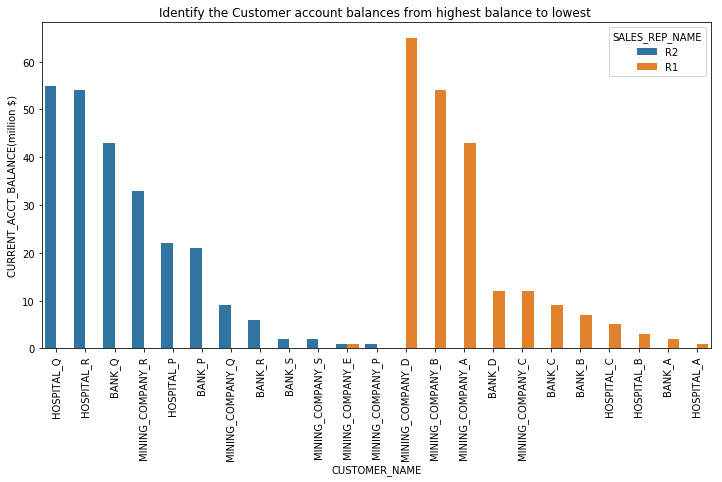

In [435]:
plt.figure(figsize=(12, 6));
Customer_since_plot1 = pd.DataFrame(Customer_since.groupby(['SALES_REP_NAME','CUSTOMER_NAME'],sort=True)['CURRENT_ACCT_BALANCE(million $)'].sum()).reset_index()
Customer_since_plot1 = Customer_since_plot1.sort_values(by=['SALES_REP_NAME','CURRENT_ACCT_BALANCE(million $)'], ascending=False)
Customer_since_plot1.reset_index()
g = sns.barplot(x='CUSTOMER_NAME', y='CURRENT_ACCT_BALANCE(million $)', data=Customer_since_plot1, hue = 'SALES_REP_NAME');
plt.xticks(rotation=90)

plt.title('Identify the Customer account balances from highest balance to lowest ');

*** Q6B. Sort Customers from Highest Balance to the lowest balance for each Sales representative in the below CUSTOMER_SINCE buckets***

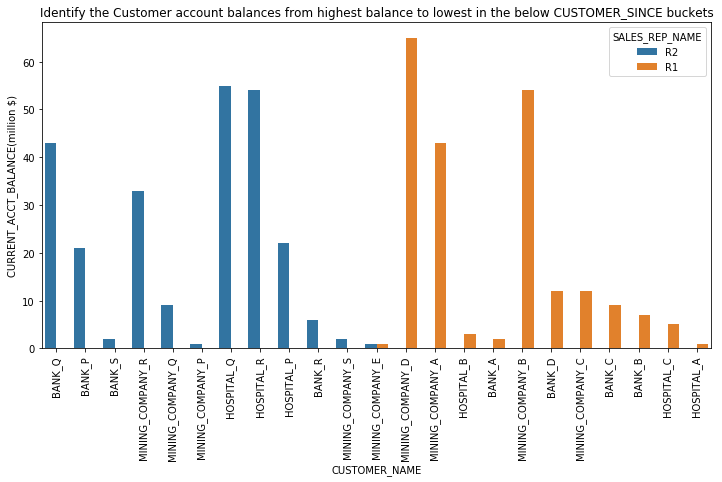

In [436]:
plt.figure(figsize=(12, 6));
Customer_since_plot2 = pd.DataFrame(Customer_since.groupby(['SALES_REP_NAME','CUSTOMER_NAME','CUSTOMER_SINCE'],sort=True)['CURRENT_ACCT_BALANCE(million $)'].sum()).reset_index()
Customer_since_plot2 = Customer_since_plot2.sort_values(by=['SALES_REP_NAME','CUSTOMER_SINCE','CURRENT_ACCT_BALANCE(million $)'], ascending=False)
Customer_since_plot2.reset_index()

g = sns.barplot(x='CUSTOMER_NAME', y='CURRENT_ACCT_BALANCE(million $)', data=Customer_since_plot2, hue = 'SALES_REP_NAME');

plt.xticks(rotation=90)

plt.title('Identify the Customer account balances from highest balance to lowest in the below CUSTOMER_SINCE buckets');

*** Q2 : Which Sales representative has better performance? R1/R2/ Data insufficient? Please explain***

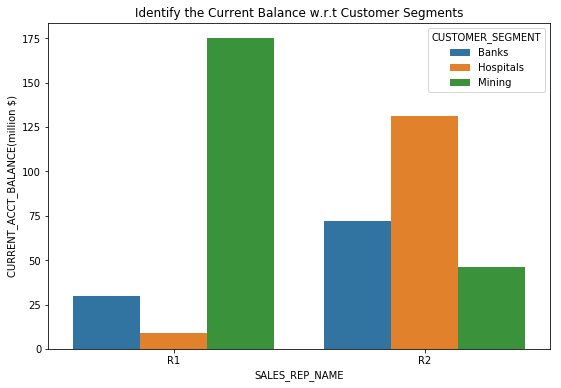

In [437]:
plt.figure(figsize=(9, 6));
Sales_plot = pd.DataFrame(DataFile.groupby(['SALES_REP_NAME','CUSTOMER_SEGMENT'],sort=True)['CURRENT_ACCT_BALANCE(million $)'].sum()).reset_index()
sns.barplot(x='SALES_REP_NAME', y='CURRENT_ACCT_BALANCE(million $)', data=Sales_plot, hue = 'CUSTOMER_SEGMENT');
plt.title('Identify the Current Balance w.r.t Customer Segments');

Based on the Data provided, R1 performs exceeding well in the Minning Segment, While R2 performs well on the banks and Hospitals. <b> However I feel that the data is insufficient for two reasons.</b> The Customers that R1 and R2 are dealing with are completely different (different names) and second is that there is defined relationship between Customer_Since and Current Account Balance.  

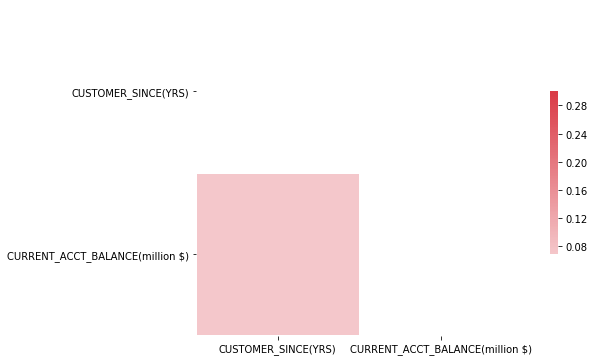

In [438]:
#Correlation Matrix
corr = DataFile.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

*** Q4. Identify the most profitable sector between Hospitals, Banks, Mining? What are some different ways of assessing this performance metric (KPI)? ***

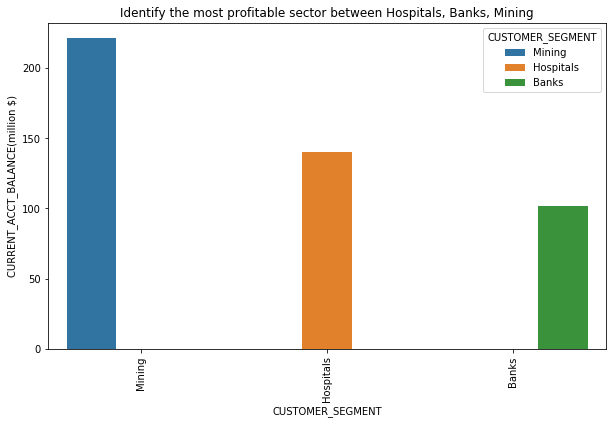

In [439]:
plt.figure(figsize=(10, 6));
Customer_since_plot3 = pd.DataFrame(Customer_since.groupby(['CUSTOMER_SEGMENT'],sort=True)['CURRENT_ACCT_BALANCE(million $)'].sum()).reset_index()
Customer_since_plot3 = Customer_since_plot3.sort_values(by=['CURRENT_ACCT_BALANCE(million $)'], ascending=False)
Customer_since_plot3.reset_index()
g = sns.barplot(x='CUSTOMER_SEGMENT', y='CURRENT_ACCT_BALANCE(million $)', data=Customer_since_plot3, hue = 'CUSTOMER_SEGMENT');
plt.xticks(rotation=90)

plt.title('Identify the most profitable sector between Hospitals, Banks, Mining');

*** From a very high level overview, taking the sum of the profits as KPI, it seems that Minning industry is the most profitable industry out of the three. However we are not considering Years since the companies have been operating. This is important factor to understand how the companies have sustained their profits over the years. I will now divide the current account balance with customer_since to get a balance sustained per year. Also I will use the Average/Mean instead of Sum. ***

In [440]:
Customer_since['BalPerYear'] = Customer_since['CURRENT_ACCT_BALANCE(million $)'] / Customer_since['CUSTOMER_SINCE(YRS)']

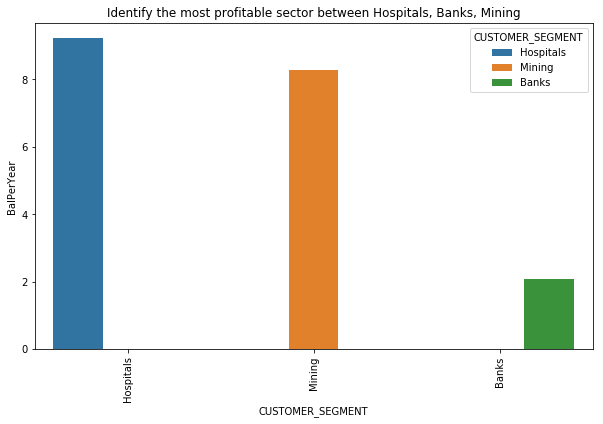

In [441]:
plt.figure(figsize=(10, 6));
Customer_since_plot4 = pd.DataFrame(Customer_since.groupby(['CUSTOMER_SEGMENT'],sort=True)['BalPerYear'].mean()).reset_index()
Customer_since_plot4 = Customer_since_plot4.sort_values(by=['BalPerYear'], ascending=False)
Customer_since_plot4.reset_index()
g = sns.barplot(x='CUSTOMER_SEGMENT', y='BalPerYear', data=Customer_since_plot4, hue = 'CUSTOMER_SEGMENT');
plt.xticks(rotation=90)

plt.title('Identify the most profitable sector between Hospitals, Banks, Mining');

*** While Minning generated the highest profit overall. It is clear that Hospital do exceeding well while considering the averages. (Average Profit being the KPI)***

*** Q5. If a new Banking customer is interested in opening an account with us, what is a reasonable account balance we can expect that customer to maintain ***

In [442]:
import warnings
warnings.filterwarnings("ignore")
#Create new Variable
Banks['BalPerYear'] = Banks['CURRENT_ACCT_BALANCE(million $)'] / Banks['CUSTOMER_SINCE(YRS)']
Banks['MeanBal'] = Banks['BalPerYear'].median(axis=0)

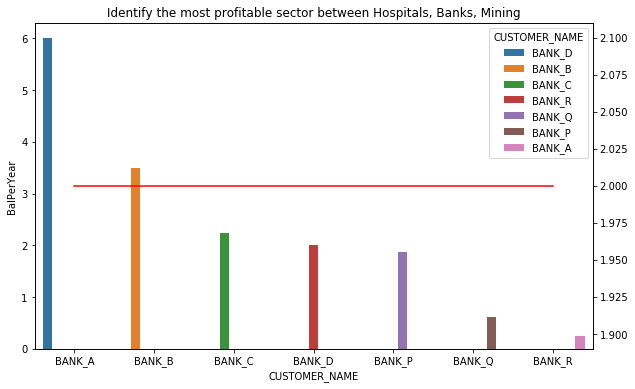

In [443]:
plt.figure(figsize=(10, 6));
banks_plot1 = pd.DataFrame(Banks.groupby(['CUSTOMER_NAME'],sort=True)['BalPerYear'].sum()).reset_index()
banks_plot2 = pd.DataFrame(Banks.groupby(['CUSTOMER_NAME'],sort=True)['MeanBal'].sum()).reset_index()

banks_plot1 = banks_plot1.sort_values(by=['BalPerYear'], ascending=False)
banks_plot1.reset_index()
g = sns.barplot(x='CUSTOMER_NAME', y='BalPerYear', data=banks_plot1, hue = 'CUSTOMER_NAME');

ax2 = g.twinx()

banks_plot2.plot(x="CUSTOMER_NAME", y="MeanBal", ax=ax2, legend=False, color="r")
plt.xticks(rotation=90)

plt.title('Identify the most profitable sector between Hospitals, Banks, Mining');

*** By Taking the median (over mean) of the existing customers, a new Banking customer is interested in opening an account with us, what is a reasonable account balance is 2 Million.***

In [444]:
gc.collect()

13611